In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import openpyxl
import numpy as np
import joblib

In [12]:
# Obteniendo Región, Tipo de delito y número de delitos, hoja comauto y resumen por Región
import pandas as pd
import openpyxl

def process_excel(file_path,sheetname):
    wb = openpyxl.load_workbook(file_path)
    sheet = sheet = wb[sheetname]  

    data = []
    actual_region_tipo = None
    encontrado_region_tipo = False 

    for row in range(8, sheet.max_row + 1): 
        cell_a_value = sheet.cell(row=row, column=1).value
        
        # Detect if the row represents a delito type. 

        if not encontrado_region_tipo or (cell_a_value != None and sheet.cell(row=row, column=2).value == None):
            actual_region_tipo = cell_a_value
            encontrado_region_tipo = True  
            continue 
        
        # After a delito type, the next rows are age  until the next delito type.

        if cell_a_value and encontrado_region_tipo:
            sexo = cell_a_value  
            for col in range(2, sheet.max_column + 1): 
                año = sheet.cell(row=7, column=col).value 
                value = sheet.cell(row=row, column=col).value
                if value != None:
                    data.append([actual_region_tipo, sexo, año, value])
            continue
        
        # Reset the flag if this row is empty 
        if cell_a_value == None:
            encontrado_region_tipo = False

    df = pd.DataFrame(data, columns=['Region', 'tipo_de_delito', 'año', 'Value'])
    return df
# Path to the Excel file you've uploaded
file_path = r'control sheet pobreza mitad.xlsx'

# Process the Excel file and print the DataFrame
df = process_excel(file_path,'comauto')
df.columns = df.columns.str.replace(' ', '_', regex=False)

df['Region'] = df['Region'].str.strip()
df['Region'] = df['Region'].apply(lambda x: ' '.join(x.split(' ')[1:]))
df['Region'] = df['Region'].str.strip()
df = df[df['Region'] != 'Nacional']

df['tipo_de_delito'] = df['tipo_de_delito'].str.strip()
df['tipo_de_delito'] = df['tipo_de_delito'].apply(lambda x: ' '.join(x.split(' ')[1:]))
df['tipo_de_delito'] = df['tipo_de_delito'].str.strip()
df = df[df['tipo_de_delito'] != 'Total Delitos']
df_region_delito = df
df_grouped_region = df_region_delito.groupby(['Region', 'año'])['Value'].sum().reset_index(name='total_region_delito')
df_grouped_region

,Region,año,total_region_delito
0,Andalucía,2013,54881
1,Andalucía,2014,53536
2,Andalucía,2015,55998
3,Andalucía,2016,70693
4,Andalucía,2017,76097
...,...,...,...
185,"Rioja, La",2018,2734
186,"Rioja, La",2019,2439
187,"Rioja, La",2020,1911
188,"Rioja, La",2021,2971


In [13]:
# Obteniendo la población total de la hoja 'poblacion' y fusionándola con el resultado anterior"
import pandas as pd
import openpyxl

def process_excel(file_path,sheetname):
    wb = openpyxl.load_workbook(file_path)
    sheet = sheet = wb[sheetname]  

    data = []
    género = None
    género_tipo = False 

    for row in range(9, sheet.max_row + 1): 
        cell_a_value = sheet.cell(row=row, column=1).value
        
        # Detect if the row represents genero 

        if not género_tipo or (cell_a_value != None and sheet.cell(row=row, column=2).value == None):
            género = cell_a_value
            género_tipo = True  
            continue 
        

        if cell_a_value and género_tipo:
            Region = cell_a_value  
            for col in range(2, sheet.max_column + 1): 
                año = sheet.cell(row=8, column=col).value 
                edad = sheet.cell(row=7, column=col).value 
                value = sheet.cell(row=row, column=col).value
                if value != None:
                    data.append([género,Region, edad, año, value])
            continue
        
        # Reset the flag if this row is empty and we're between delito types
        if cell_a_value == None:
            género_tipo = False

    df = pd.DataFrame(data, columns=['género','Region', 'edad', 'año', 'Value'])
    return df
# Path to the Excel file you've uploaded
file_path = r'control sheet pobreza mitad.xlsx'

# Process the Excel file and print the DataFrame
df = process_excel(file_path,'poblacion')
df.columns = df.columns.str.replace(' ', '_', regex=False)
#df = df[df['Region'] != 'Total Nacional']
df['Region'] = df['Region'].str.strip()
df['Region'] = df['Region'].apply(lambda x: ' '.join(x.split(' ')[1:]))
df['Region'] = df['Region'].str.strip()
df['género'] = df['género'].str.strip()
#df['tipo_de_delito'] = df['tipo_de_delito'].apply(lambda x: ' '.join(x.split(' ')[1:]))
#df['tipo_de_delito'] = df['tipo_de_delito'].str.strip()

#df = df[df['tipo_de_delito'] != 'Total Delitos']

df_region_género_edad = df
df_grouped_region_pob = df_region_género_edad[df_region_género_edad['género'] == 'Ambos sexos']
df_grouped_region_pob = df_grouped_region_pob[df_grouped_region_pob['Region'] != 'TOTAL']
df_grouped_region_pob = df_grouped_region_pob[df_grouped_region_pob['Region'] != '']
df_grouped_region_pob['Value']   = df_grouped_region_pob['Value']  * 1000
df_grouped_region_pob = df_grouped_region_pob.groupby(['Region', 'año'])['Value'].sum().reset_index(name='total_region')
merged_grouped_region_pob = pd.merge(df_grouped_region, df_grouped_region_pob, on=['Region','año'])
merged_grouped_region_pob['perc_delito'] = ( merged_grouped_region_pob['total_region_delito']/merged_grouped_region_pob['total_region'] ) * 100
merged_grouped_region_pob


,Region,año,total_region_delito,total_region,perc_delito
0,Andalucía,2013,54881,6856500.0,0.800423
1,Andalucía,2014,53536,6864900.0,0.779851
2,Andalucía,2015,55998,6879300.0,0.814007
3,Andalucía,2016,70693,6891100.0,1.025859
4,Andalucía,2017,76097,5515900.0,1.379594
...,...,...,...,...,...
185,"Rioja, La",2018,2734,260500.0,1.04952
186,"Rioja, La",2019,2439,262500.0,0.929143
187,"Rioja, La",2020,1911,264600.0,0.722222
188,"Rioja, La",2021,2971,264300.0,1.124101


In [14]:
# Obteniendo la pobreza total de la hoja 'pobreza' y fusionándola con el resultado anterior"
import pandas as pd
import openpyxl

def process_excel(file_path,sheetname):
    wb = openpyxl.load_workbook(file_path)
    sheet = sheet = wb[sheetname]  

    data = []

    for row in range(9, sheet.max_row + 1): 
        cell_a_value = sheet.cell(row=row, column=1).value
        
        # the new cell represents region

        if cell_a_value:
            Region = cell_a_value  
            for col in range(2, sheet.max_column + 1): 
                año = sheet.cell(row=8, column=col).value 
                value = sheet.cell(row=row, column=col).value
                if value != None:
                    data.append([Region, año, value])
            continue
        
        # Reset the flag if this row is empty and we're between delito types


    df = pd.DataFrame(data, columns=['Region',  'año', 'Value'])
    return df
# Path to the Excel file you've uploaded
file_path = r'control sheet pobreza mitad.xlsx'

# Process the Excel file and print the DataFrame
df = process_excel(file_path,'pobreza')
df.columns = df.columns.str.replace(' ', '_', regex=False)

df['Region'] = df['Region'].apply(lambda x: ' '.join(x.split(' ')[1:]))
df['Region'] = df['Region'].str.strip()
df = df[df['Region'] != 'Nacional']
#df['género'] = df['género'].str.strip()
#df['tipo_de_delito'] = df['tipo_de_delito'].apply(lambda x: ' '.join(x.split(' ')[1:]))
#df['tipo_de_delito'] = df['tipo_de_delito'].str.strip()

#df = df[df['tipo_de_delito'] != 'Total Delitos']

df_region_pobreza = df
df_grouped_pobreza_pob = df_region_pobreza.groupby(['Region', 'año'])['Value'].sum().reset_index(name='total_region_pobreza')
merged_grouped_region_probeza = pd.merge(merged_grouped_region_pob, df_grouped_pobreza_pob, on=['Region','año'])
merged_grouped_region_probeza

,Region,año,total_region_delito,total_region,perc_delito,total_region_pobreza
0,Andalucía,2013,54881,6856500.0,0.800423,14.55
1,Andalucía,2014,53536,6864900.0,0.779851,16.65
2,Andalucía,2015,55998,6879300.0,0.814007,17.85
3,Andalucía,2016,70693,6891100.0,1.025859,17.70
4,Andalucía,2017,76097,5515900.0,1.379594,15.50
...,...,...,...,...,...,...
185,"Rioja, La",2018,2734,260500.0,1.04952,8.30
186,"Rioja, La",2019,2439,262500.0,0.929143,6.15
187,"Rioja, La",2020,1911,264600.0,0.722222,7.50
188,"Rioja, La",2021,2971,264300.0,1.124101,8.05


In [20]:
# Obteniendo la estudios total de la hoja 'estudios' y fusionándola con el resultado anterior"
import pandas as pd
import openpyxl

def process_excel(file_path,sheetname):
    wb = openpyxl.load_workbook(file_path)
    sheet = sheet = wb[sheetname]  

    data = []
    género = None
    género_tipo = False 

    for row in range(9, sheet.max_row + 1): 
        cell_a_value = sheet.cell(row=row, column=1).value
        
        # Detect if the row represents genero

        if not género_tipo or (cell_a_value != None and sheet.cell(row=row, column=2).value == None):
            género = cell_a_value
            género_tipo = True  
            continue 
        
        # After a genero type, the next rows are region  until the next genero type.

        if cell_a_value and género_tipo:
            Region = cell_a_value  
            for col in range(2, sheet.max_column + 1): 
                año = sheet.cell(row=8, column=col).value[:-2] 
                estudios = sheet.cell(row=7, column=col).value 
                value = sheet.cell(row=row, column=col).value
                if value != None:
                    data.append([género,Region, estudios, año, value])
            continue
        
        # Reset the flag if this row is empty and we're between delito types
        if cell_a_value == None:
            género_tipo = False

    df = pd.DataFrame(data, columns=['género','Region', 'estudios', 'año', 'Value'])
    return df
# Path to the Excel file you've uploaded
file_path = r'control sheet pobreza mitad.xlsx'

# Process the Excel file and print the DataFrame
df = process_excel(file_path,'estudios')
df.columns = df.columns.str.replace(' ', '_', regex=False)
#df = df[df['Region'] != 'Total Nacional']
df['Region'] = df['Region'].str.strip()
df['Region'] = df['Region'].apply(lambda x: ' '.join(x.split(' ')[1:]))
df['Region'] = df['Region'].str.strip()
df['género'] = df['género'].str.strip()
#df['tipo_de_delito'] = df['tipo_de_delito'].apply(lambda x: ' '.join(x.split(' ')[1:]))
#df['tipo_de_delito'] = df['tipo_de_delito'].str.strip()

#df = df[df['tipo_de_delito'] != 'Total Delitos']

df_género_region_estudios = df
df_grouped_region_estudios = df_género_region_estudios[df_género_region_estudios['género'] == 'Ambos sexos both sex']
df_grouped_region_estudios = df_grouped_region_estudios[df_grouped_region_estudios['Region'] != 'Nacional']
df_grouped_region_estudios = df_grouped_region_estudios[df_grouped_region_estudios['Region'] != '']
df_grouped_region_estudios['Value']   = df_grouped_region_estudios['Value'] 
df_grouped_region_estudios = df_grouped_region_estudios.groupby(['género','Region','estudios', 'año'])['Value'].mean().reset_index(name='total_region_estudios')
df_grouped_region_estudios = df_grouped_region_estudios.groupby(['Region','estudios', 'año'])['total_region_estudios'].sum().reset_index(name='total_region_estudios_fin')


df_grouped_region_estudios = df_grouped_region_estudios.pivot(index=['Region','año'], columns='estudios', values='total_region_estudios_fin')
df_grouped_region_estudios.columns = [''.join(col).strip() for col in df_grouped_region_estudios.columns.values]

df_grouped_region_estudios.reset_index(inplace=True)
merged_grouped_region_estudios_temp = pd.merge(merged_grouped_region_probeza, df_grouped_region_estudios, on=['Region','año'])

# backfilling step for year 2013 as this is missing , Using 204 as base
merged_grouped_region_estudios_2014 = merged_grouped_region_estudios_temp[merged_grouped_region_estudios_temp['año'] == '2014'].copy()
merged_grouped_region_estudios_2014['año'] = '2013'
merged_grouped_region_estudios = pd.concat([merged_grouped_region_estudios_temp, merged_grouped_region_estudios_2014], ignore_index=True)
merged_grouped_region_estudios.sort_values(by='año', inplace=True)
merged_grouped_region_estudios


,Region,año,total_region_delito,total_region,perc_delito,total_region_pobreza,Analfabetos,Educación primaria,Educación superior,Escuela Profesional,Escuela Secundaria,Estudios primarios incompletos,Licenciado
189,"Rioja, La",2013,1890,259900.0,0.727203,8.10,0.65,19.575,28.825,8.525,26.05,3.55,12.85
188,País Vasco,2013,10538,1813900.0,0.580958,5.10,0.625,17.85,36.425,9.125,22.975,2.35,10.625
171,Andalucía,2013,53536,6864900.0,0.779851,16.65,3.775,14.625,21.775,7.25,31.125,9.85,11.65
173,"Asturias, Principado de",2013,6196,920400.0,0.673186,8.35,0.65,23.0,29.575,7.05,22.575,4.875,12.275
174,"Balears, Illes",2013,9176,930100.0,0.986561,8.95,1.85,11.75,22.775,6.875,34.35,6.925,15.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53,Cantabria,2022,5530,500800.0,1.104233,7.40,0.325,8.475,35.35,10.35,31.45,0.825,13.225
161,País Vasco,2022,21150,1838800.0,1.150207,6.10,0.35,10.45,44.325,9.575,20.95,2.125,12.3
152,"Navarra, Comunidad Foral de",2022,5515,547000.0,1.008227,5.45,0.825,12.375,37.7,10.7,23.275,2.2,12.925
26,"Asturias, Principado de",2022,8963,882400.0,1.015752,10.05,0.7,8.925,33.325,9.175,31.875,2.425,13.575


In [21]:
# Obteniendo la genero total de la hoja 'genero' y fusionándola con el resultado anterior"
import pandas as pd
import openpyxl

def process_excel(file_path,sheetname):
    wb = openpyxl.load_workbook(file_path)
    sheet = sheet = wb[sheetname]  # Assumes the data is in the first sheet

    data = []
    region = None
    region_tipo = False 

    for row in range(8, sheet.max_row + 1): 
        cell_a_value = sheet.cell(row=row, column=1).value
        
        # Detect if the row represents a region type. 

        if not region_tipo or (cell_a_value != None and sheet.cell(row=row, column=2).value == None):
            region = cell_a_value
            region_tipo = True  
            continue 
        
        # After a region type, the next rows are género  until the next region type.

        if cell_a_value and region_tipo:
            género = cell_a_value  
            for col in range(2, sheet.max_column + 1): 
                año = sheet.cell(row=7, column=col).value 
                value = sheet.cell(row=row, column=col).value
                if value != None:
                    data.append([region,género,  año, value])
            continue
        
        # Reset the flag if this row is empty 
        if cell_a_value == None:
            region_tipo = False

    df = pd.DataFrame(data, columns=['Region','género',  'año', 'Value'])
    return df
# Path to the Excel file you've uploaded
file_path = r'control sheet pobreza mitad.xlsx'

# Process the Excel file and print the DataFrame
df = process_excel(file_path,'genero')
df.columns = df.columns.str.replace(' ', '_', regex=False)
#df = df[df['Region'] != 'Total Nacional']
df['Region'] = df['Region'].str.strip()
df['Region'] = df['Region'].apply(lambda x: ' '.join(x.split(' ')[1:]))
df['Region'] = df['Region'].str.strip()
df['género'] = df['género'].str.strip()
df = df[df['Region'] != 'Nacional']
#df['tipo_de_delito'] = df['tipo_de_delito'].apply(lambda x: ' '.join(x.split(' ')[1:]))
#df['tipo_de_delito'] = df['tipo_de_delito'].str.strip()

#df = df[df['tipo_de_delito'] != 'Total Delitos']

df_region_género = df
df_grouped_region_género_perc = df_region_género.pivot(index=['Region','año'], columns='género', values='Value')
df_grouped_region_género_perc.columns = [''.join(col).strip() for col in df_grouped_region_género_perc.columns.values]
df_grouped_region_género_perc.reset_index(inplace=True)
df_grouped_region_género_perc['hombres_ratio'] = df_grouped_region_género_perc['Hombres']/df_grouped_region_género_perc['Total']
df_grouped_region_género_perc['mujeres_ratio'] = df_grouped_region_género_perc['Mujeres']/df_grouped_region_género_perc['Total']
merged_grouped_region_género_perc = pd.merge(merged_grouped_region_estudios, df_grouped_region_género_perc, on=['Region','año'])
merged_grouped_region_género_perc['perc_hombres'] = ( merged_grouped_region_género_perc['hombres_ratio']* 100 ).round(2)
merged_grouped_region_género_perc['perc_mujeres'] = ( merged_grouped_region_género_perc['mujeres_ratio']* 100 ).round(2)

merged_grouped_region_género_perc

,Region,año,total_region_delito,total_region,perc_delito,total_region_pobreza,Analfabetos,Educación primaria,Educación superior,Escuela Profesional,Escuela Secundaria,Estudios primarios incompletos,Licenciado,Hombres,Mujeres,Total,hombres_ratio,mujeres_ratio,perc_hombres,perc_mujeres
0,"Rioja, La",2013,1890,259900.0,0.727203,8.10,0.65,19.575,28.825,8.525,26.05,3.55,12.85,1517,169,1686,0.899763,0.100237,89.98,10.02
1,País Vasco,2013,10538,1813900.0,0.580958,5.10,0.625,17.85,36.425,9.125,22.975,2.35,10.625,9856,1113,10969,0.898532,0.101468,89.85,10.15
2,Andalucía,2013,53536,6864900.0,0.779851,16.65,3.775,14.625,21.775,7.25,31.125,9.85,11.65,49060,5821,54881,0.893934,0.106066,89.39,10.61
3,"Asturias, Principado de",2013,6196,920400.0,0.673186,8.35,0.65,23.0,29.575,7.05,22.575,4.875,12.275,5410,666,6076,0.890388,0.109612,89.04,10.96
4,"Balears, Illes",2013,9176,930100.0,0.986561,8.95,1.85,11.75,22.775,6.875,34.35,6.925,15.45,7821,1097,8918,0.876990,0.123010,87.70,12.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,Cantabria,2022,5530,500800.0,1.104233,7.40,0.325,8.475,35.35,10.35,31.45,0.825,13.225,4418,1112,5530,0.798915,0.201085,79.89,20.11
186,País Vasco,2022,21150,1838800.0,1.150207,6.10,0.35,10.45,44.325,9.575,20.95,2.125,12.3,17346,3804,21150,0.820142,0.179858,82.01,17.99
187,"Navarra, Comunidad Foral de",2022,5515,547000.0,1.008227,5.45,0.825,12.375,37.7,10.7,23.275,2.2,12.925,4728,787,5515,0.857298,0.142702,85.73,14.27
188,"Asturias, Principado de",2022,8963,882400.0,1.015752,10.05,0.7,8.925,33.325,9.175,31.875,2.425,13.575,7163,1800,8963,0.799174,0.200826,79.92,20.08


In [22]:
#final result set creation and exporting to excel
merged_grouped_region_género_perc.columns = merged_grouped_region_género_perc.columns.str.replace(' ', '_', regex=False)
final_df = merged_grouped_region_género_perc[['Region','año','perc_delito','perc_hombres','perc_mujeres','total_region_pobreza','Analfabetos',	'Educación_primaria',	'Educación_superior',	'Escuela_Profesional',	'Escuela_Secundaria',	'Estudios_primarios_incompletos',	'Licenciado'	]]
final_df.rename(columns={'total_region_pobreza': 'perc_pobreza'}, inplace=True)
columns_to_convert = ['perc_delito','perc_hombres','perc_mujeres','perc_pobreza','Analfabetos',	'Educación_primaria',	'Educación_superior',	'Escuela_Profesional',	'Escuela_Secundaria',	'Estudios_primarios_incompletos',	'Licenciado']
for column in columns_to_convert:
    final_df[column] = pd.to_numeric(final_df[column], errors='coerce')
final_df[columns_to_convert] = final_df[columns_to_convert].round(2)
file_path = r'Complete dataset final_probeza.xlsx'
final_df.to_excel(file_path, index=False, engine='openpyxl')
final_df 

,Region,año,perc_delito,perc_hombres,perc_mujeres,perc_pobreza,Analfabetos,Educación_primaria,Educación_superior,Escuela_Profesional,Escuela_Secundaria,Estudios_primarios_incompletos,Licenciado
0,"Rioja, La",2013,0.73,89.98,10.02,8.10,0.65,19.58,28.83,8.52,26.05,3.55,12.85
1,País Vasco,2013,0.58,89.85,10.15,5.10,0.62,17.85,36.42,9.12,22.98,2.35,10.62
2,Andalucía,2013,0.78,89.39,10.61,16.65,3.78,14.62,21.78,7.25,31.12,9.85,11.65
3,"Asturias, Principado de",2013,0.67,89.04,10.96,8.35,0.65,23.00,29.58,7.05,22.58,4.88,12.28
4,"Balears, Illes",2013,0.99,87.70,12.30,8.95,1.85,11.75,22.78,6.88,34.35,6.92,15.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,Cantabria,2022,1.10,79.89,20.11,7.40,0.32,8.48,35.35,10.35,31.45,0.82,13.22
186,País Vasco,2022,1.15,82.01,17.99,6.10,0.35,10.45,44.32,9.58,20.95,2.12,12.30
187,"Navarra, Comunidad Foral de",2022,1.01,85.73,14.27,5.45,0.82,12.37,37.70,10.70,23.28,2.20,12.92
188,"Asturias, Principado de",2022,1.02,79.92,20.08,10.05,0.70,8.93,33.33,9.18,31.88,2.42,13.58


In [23]:


df_filtered_summ = final_df


In [ ]:
#there is not so muchn variation and so result will have less impact based on genero

In [24]:
#porcentaje Delitos has strong positive and negative relationship based on education level.
#porcentaje Delitos and poverty porcentaje also has a good psoitive correlaltion
#porcentaje Delitos and genero also has little correlation and can be dropped
#Dropping fields with less correlation with porcentaje Delitos
df_filtered_summ = df_filtered_summ.drop('Escuela_Secundaria', axis=1)
df_filtered_summ = df_filtered_summ.drop('Estudios_primarios_incompletos', axis=1)
df_filtered_summ = df_filtered_summ.drop('Educación_primaria', axis=1)
df_filtered_summ = df_filtered_summ.drop('perc_hombres', axis=1)
df_filtered_summ = df_filtered_summ.drop('perc_mujeres', axis=1)


In [25]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import joblib  # for saving the encoder model

# Initialize the encoders
region_encoder = LabelEncoder()
df_filtered_summ = df_filtered_summ.drop(['Region_encoded'], axis=1, errors='ignore')
# Assuming your DataFrame 'df' has 'type_of_delito' and 'age' columns
df_filtered_summ['region_encoded'] = region_encoder.fit_transform(df_filtered_summ['Region'])
df_filtered_summ

,Region,año,perc_delito,perc_pobreza,Analfabetos,Educación_superior,Escuela_Profesional,Licenciado,region_encoded
0,"Rioja, La",2013,0.73,8.10,0.65,28.83,8.52,12.85,18
1,País Vasco,2013,0.58,5.10,0.62,36.42,9.12,10.62,17
2,Andalucía,2013,0.78,16.65,3.78,21.78,7.25,11.65,0
3,"Asturias, Principado de",2013,0.67,8.35,0.65,29.58,7.05,12.28,2
4,"Balears, Illes",2013,0.99,8.95,1.85,22.78,6.88,15.45,3
...,...,...,...,...,...,...,...,...,...
185,Cantabria,2022,1.10,7.40,0.32,35.35,10.35,13.22,5
186,País Vasco,2022,1.15,6.10,0.35,44.32,9.58,12.30,17
187,"Navarra, Comunidad Foral de",2022,1.01,5.45,0.82,37.70,10.70,12.92,16
188,"Asturias, Principado de",2022,1.02,10.05,0.70,33.33,9.18,13.58,2


In [ ]:
#Prediction using prophet

In [26]:
df_filtered_summ['ds'] = pd.to_datetime(df_filtered_summ['año'].astype(str) + '-12-31')
df_filtered_summ['y'] = df_filtered_summ['perc_delito']

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error



In [28]:
    # Initialize and fit the Prophet model with additional regressors
from prophet  import Prophet
import pandas as pd
# Get unique regions from the DataFrame
unique_regions = df_filtered_summ['Region'].unique()
lgbm_models = {}
for region in unique_regions:
  model = Prophet(yearly_seasonality=False)
  model.add_regressor('perc_pobreza')
  model.add_regressor('Analfabetos')
  model.add_regressor('Educación_superior')
  model.add_regressor('Escuela_Profesional')
  model.add_regressor('Licenciado')
  model.fit(df_filtered_summ[df_filtered_summ['Region'] == region ][['ds','perc_pobreza','Analfabetos','Educación_superior','Escuela_Profesional','Licenciado','y']], algorithm='LBFGS', iter=20000)
  lgbm_models[region] = model

21:14:20 - cmdstanpy - INFO - Chain [1] start processing
21:14:20 - cmdstanpy - INFO - Chain [1] done processing
21:14:20 - cmdstanpy - INFO - Chain [1] start processing
21:14:20 - cmdstanpy - INFO - Chain [1] done processing
21:14:21 - cmdstanpy - INFO - Chain [1] start processing
21:14:21 - cmdstanpy - INFO - Chain [1] done processing
21:14:21 - cmdstanpy - INFO - Chain [1] start processing
21:14:21 - cmdstanpy - INFO - Chain [1] done processing
21:14:21 - cmdstanpy - INFO - Chain [1] start processing
21:14:22 - cmdstanpy - INFO - Chain [1] done processing
21:14:22 - cmdstanpy - INFO - Chain [1] start processing
21:14:22 - cmdstanpy - INFO - Chain [1] done processing
21:14:22 - cmdstanpy - INFO - Chain [1] start processing
21:14:22 - cmdstanpy - INFO - Chain [1] done processing
21:14:23 - cmdstanpy - INFO - Chain [1] start processing
21:14:23 - cmdstanpy - INFO - Chain [1] done processing
21:14:23 - cmdstanpy - INFO - Chain [1] start processing
21:14:23 - cmdstanpy - INFO - Chain [1]

In [29]:
año_de_predicción = 2025

In [30]:

# Load the region encoder
loaded_region_encoder = joblib.load('region_encoder.joblib')
final_pred_df_proph = df_filtered_summ
# Iterate over each unique combination
# Get unique regions from the DataFrame
unique_regions = df_filtered_summ['Region'].unique()

# Prepare future DataFrame for predictions
last_known_year = df_filtered_summ['ds'].dt.year.max()
future_years = list(range(last_known_year + 1, año_de_predicción + 1))
future_dates = pd.to_datetime([f"{year}-12-31" for year in future_years])

# Dictionary to hold predictions for each region
region_predictions = {}

for region in unique_regions:
    # Encode the current region
    input_region_encoded = loaded_region_encoder.transform([region])[0]
    
    # Get the last known values for the additional regressors
    last_values = df_filtered_summ[df_filtered_summ['Region'] == region].iloc[-1]
    
    # Prepare the future DataFrame for the current region
    future_df = pd.DataFrame({
        'ds': future_dates,
        'region_encoded': input_region_encoded,
        'perc_pobreza': last_values['perc_pobreza'],
        'Analfabetos': last_values['Analfabetos'],
        'Educación_superior': last_values['Educación_superior'],
        'Escuela_Profesional': last_values['Escuela_Profesional'],
        'Licenciado': last_values['Licenciado']
    })
    
    # Make predictions for the current region
    Pronóstico = lgbm_models[region].predict(future_df)
    merged_grouped_prophh = pd.merge(future_df, Pronóstico, on=['ds'])
    merged_grouped_prophh['Region'] = region
    merged_grouped_prophh['año'] =  merged_grouped_prophh['ds'].dt.year
    merged_grouped_prophh = merged_grouped_prophh.rename(columns={'yhat': 'y','perc_pobreza_x': 'perc_pobreza','Analfabetos_x': 'Analfabetos','Educación_superior_x': 'Educación_superior','Escuela_Profesional_x': 'Escuela_Profesional','Licenciado_x': 'Licenciado'})
    columns_to_select = ['Region', 'año',  'perc_pobreza', 'Analfabetos', 
                     'Educación_superior', 'Escuela_Profesional', 'Licenciado', 
                     'region_encoded', 'ds', 'y']
    final_pred_df_proph = pd.concat([final_pred_df_proph,merged_grouped_prophh[columns_to_select]])
    # Store or process the predictions
    region_predictions[region] = Pronóstico
    


In [31]:

final_pred_df_proph

,Region,año,perc_delito,perc_pobreza,Analfabetos,Educación_superior,Escuela_Profesional,Licenciado,region_encoded,ds,y
0,"Rioja, La",2013,0.73,8.10,0.65,28.83,8.52,12.85,18,2013-12-31,0.730000
1,País Vasco,2013,0.58,5.10,0.62,36.42,9.12,10.62,17,2013-12-31,0.580000
2,Andalucía,2013,0.78,16.65,3.78,21.78,7.25,11.65,0,2013-12-31,0.780000
3,"Asturias, Principado de",2013,0.67,8.35,0.65,29.58,7.05,12.28,2,2013-12-31,0.670000
4,"Balears, Illes",2013,0.99,8.95,1.85,22.78,6.88,15.45,3,2013-12-31,0.990000
...,...,...,...,...,...,...,...,...,...,...,...
1,Cataluña,2024,NaN,7.25,1.27,34.85,8.08,13.50,8,2024-12-31,1.193720
2,Cataluña,2025,NaN,7.25,1.27,34.85,8.08,13.50,8,2025-12-31,1.243401
0,"Navarra, Comunidad Foral de",2023,NaN,5.45,0.82,37.70,10.70,12.92,16,2023-12-31,0.990980
1,"Navarra, Comunidad Foral de",2024,NaN,5.45,0.82,37.70,10.70,12.92,16,2024-12-31,0.975244


In [32]:
file_path = r'Predicción completa para Prophet con retrasos construidos (región)_probeza.xlsx'
final_pred_df_proph.to_excel(file_path, index=False, engine='openpyxl')


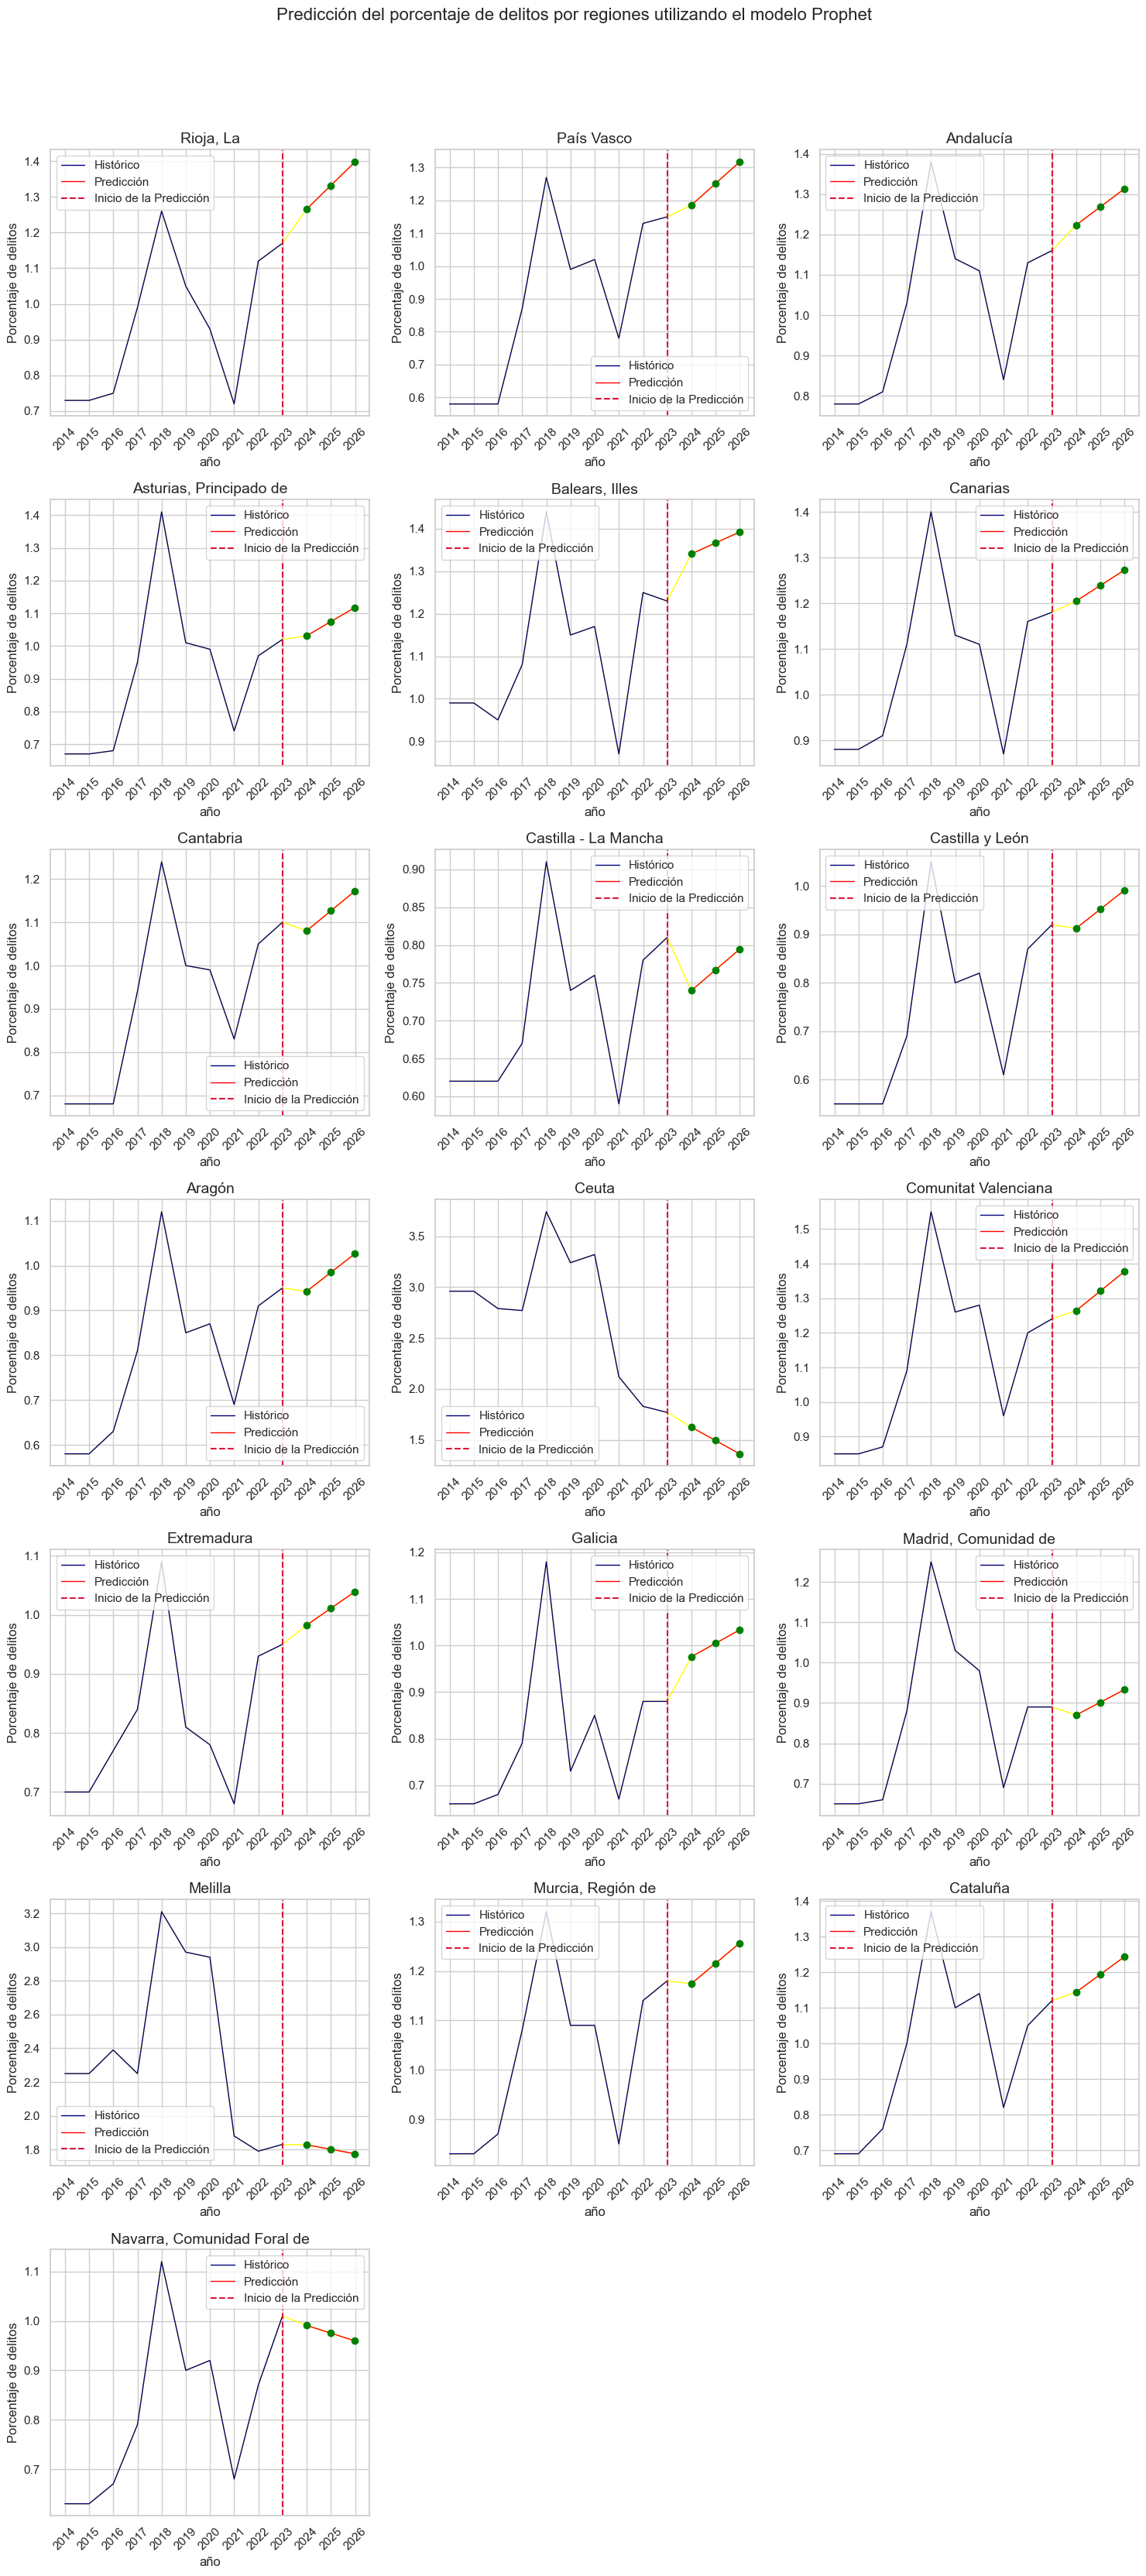

In [33]:

from math import ceil, sqrt
import matplotlib.dates as mdates
sns.set(style="whitegrid")

num_regions = len(region_predictions)
cols = 3  
rows = ceil(num_regions / cols)  

fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 5))
fig.subplots_adjust(hspace=0.6, wspace=0.4, top=.9)

axes = axes.flatten() if rows * cols > 1 else [axes]

for index, (region, Pronóstico) in enumerate(region_predictions.items()):
    # Filter historical data for the current region
    input_region_encoded = loaded_region_encoder.transform([region])[0]
    historical_data = df_filtered_summ[(df_filtered_summ['region_encoded'] == input_region_encoded)]

    # Prepare forecast data for plotting
    Pronóstico_data = Pronóstico[['ds', 'yhat']].rename(columns={'yhat': 'y'})
    
    # Combine historical and forecast data
    combined_data = pd.concat([historical_data, Pronóstico_data])
    combined_data = combined_data.sort_values(by='ds')


    ax = axes[index]
    ax.plot(combined_data['ds'], combined_data['y'], color='yellow', linewidth=1)
    ax.plot(historical_data['ds'], historical_data['y'], label='Histórico', color='navy', linewidth=1)
    ax.plot(Pronóstico_data['ds'], Pronóstico_data['y'], label='Predicción', color='red', linewidth=1)
    ax.scatter(Pronóstico_data['ds'], Pronóstico_data['y'], color='green', zorder=5)

    #ax.plot(combined_data['ds'], combined_data['y'], label='Histórico + Predicción', color='navy', linewidth=2)
    ax.axvline(x=pd.to_datetime('2023'), color='crimson', linestyle='--', label='Inicio de la Predicción')
    ax.set_xlabel('año')
    ax.set_ylabel('Porcentaje de delitos')
    ax.set_title(f'{region}', fontsize=14)
    ax.legend()

    # Set date formatting
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

    # Explicitly enable the visibility of the x-axis labels for each subplot
    for label in ax.get_xticklabels():
        label.set_visible(True)
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
# Hide any unused axes 
for i in range(index + 1, len(axes)):
    axes[i].set_visible(False)
fig.suptitle('Predicción del porcentaje de delitos por regiones utilizando el modelo Prophet', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

